In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/all_parliamentarians_rule_annotated.csv',lineterminator='\n')
print(df.shape)
df = df[df['region']=="Bund"]
df.created_at = pd.to_datetime(df['created_at'])
df = df.set_index('created_at')
df.head()

(1927462, 7)


,id,text,author_id,region,party,parltype
created_at,,,,,,
2021-08-24 09:11:23+00:00,1430095381593985024,"@rainerfaus @bertpsch Ja, im Freundes- und Bek...",52024480,Bund,GRUENE,Bund
2021-09-02 07:35:26+00:00,1433332723985391616,"""Wir müssen Raum schaffen"", sagt Janecek, Raum...",52024480,Bund,GRUENE,Bund
2021-08-09 22:16:01+00:00,1424857024454696968,„Baerbocks Rede dreht sich zunächst vor allem ...,52024480,Bund,GRUENE,Bund
2021-08-24 06:42:55+00:00,1430058016997617683,"Ich freue mich, kommenden Montag die Spitzenka...",52024480,Bund,GRUENE,Bund
2021-06-21 22:08:05+00:00,1407098021989470218,Wenn der Technologieturbo so gut funktioniert ...,52024480,Bund,GRUENE,Bund


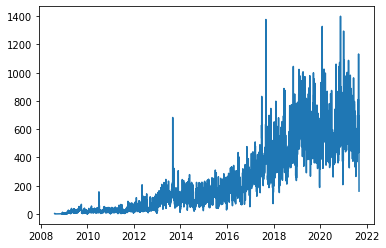

In [2]:
df.groupby(df.index.date)['id'].count().plot()

In [3]:
cdict = {'afd': '#009EE0',
 'bp': None,
 'cducsu': '#000000',
 'dp': None,
 'drp': None,
 'dzp': None,
 'fdp': '#FFED00',
 'fraktionslos': None,
 'gb/bhe': None,
 'gruene': '#64A12D',
 'kpd': None,
 'linke': '#8C3473',
 'other': None,
 'parteilos': None,
 'pds': None,
 'spd': '#EB001F',
 'wav': None}

In [4]:
# Tag documents according to whether they contain a keyword or not

gender_topics = [
    {"name": "Gender","keywords":[r"\bgender"]},
    {"name": "Geschlecht", "keywords": [r"\bgeschlecht"]}
]
for t in gender_topics:
    df[t["name"]] = 0
    for term in t["keywords"]:
        df.loc[df['text'].str.lower().str.contains(term),t["name"]] = 1

In [5]:
# Two dates to filter the data with

import datetime, pytz
cutoffs = [
    datetime.datetime(2017,10,24,tzinfo=pytz.UTC),
    datetime.datetime(2021,1,1,tzinfo=pytz.UTC)
]

17-10-24


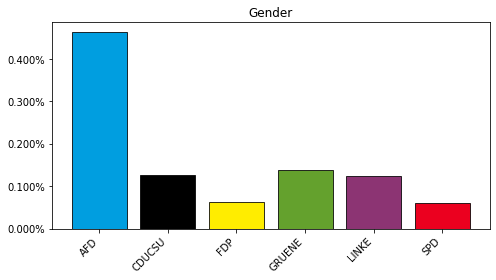

21-01-01


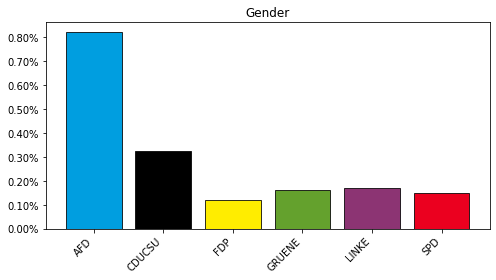

In [6]:
## 1. Proportion of each party's tweets using the term gender

topic = {"name":"Gender"}

for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    ticks = []
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup[topic['name']].sum()/pgroup.shape[0], 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )
        ticks.append(party)

    ax.set_title(topic["name"])
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")
    import matplotlib.ticker as mtick
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
        #break

    fig.tight_layout()
    plt.savefig(f"plots/1_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/1_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    plt.show()

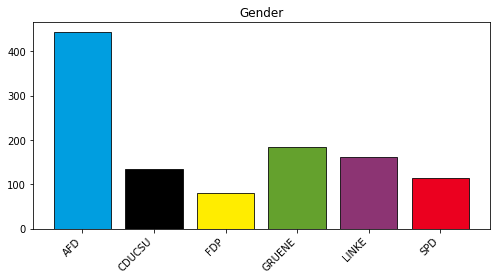

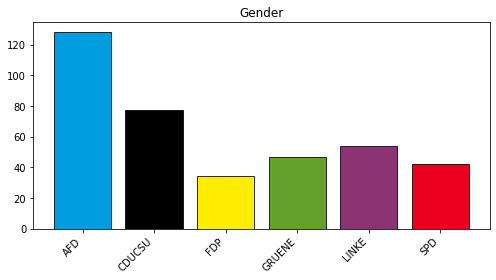

In [19]:
#2 Absolute number of tweets/posts using the term ‘gender’
for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup[topic['name']].sum(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_title(topic["name"])
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")   

    fig.tight_layout()
    plt.savefig(f"plots/2_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/2_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")

    plt.show()

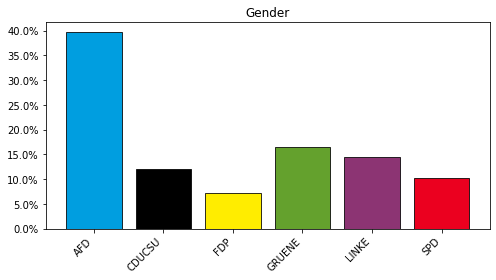

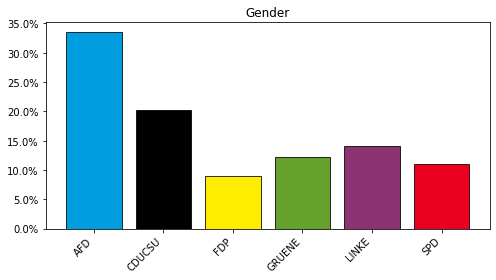

In [20]:
#3 Proportion of all the tweets/posts about ‘gender’, divided by party
for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    for i, (party, pgroup) in enumerate(df[df.index>cutoff].groupby('party')):
        ax.bar(
            i, pgroup[topic['name']].sum()/df[df.index>cutoff][topic['name']].sum(), 
            color=cdict[party.lower()], lw=0.8,ec="black"
        )        
    ax.set_title(topic["name"])
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=45,ha="right")    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    
    fig.tight_layout()
    plt.savefig(f"plots/3_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/3_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    plt.show()

In [32]:
#4 Which politicians are tweeting/posting about gender the most - load full mdb data

author_df = pd.read_csv('~/Documents/papers/iass-mcc-twitter-colab/data/all_parliamentarians.csv').rename(columns={"id":"author_id"})
author_df = author_df[author_df['region']=="Bund"]
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Nachname"] + ", " + author_df.loc[noname,"Vorname"]
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Vorname Nachname"]
author_df['Name, Vorname'] = author_df['Name, Vorname'].str.strip()

17-10-24


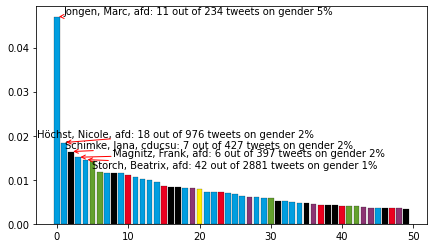

In [33]:
#4 
from adjustText import adjust_text

for cutoff in cutoffs:
    print(cutoff.strftime('%y-%m-%d'))
    fig, ax = plt.subplots(figsize=(7,4))
    
    authors = df[df.index>cutoff].groupby('author_id')['Gender'].aggregate(["count","sum"]).reset_index()
    authors['prop'] = authors['sum'] / authors['count']
    authors = authors.sort_values('prop',ascending=False).reset_index(drop=True).merge(author_df)
    
    sub_df = authors[(authors['prop']>0)].head(50)
    colors = [cdict[x.lower()] for x in sub_df.party]
    colors = [x if x is not None else "None" for x in colors]
    bars = ax.bar(sub_df.index, sub_df.prop,color=colors,ec="black",lw=0.2)

    texts = []

    for i, row in sub_df.head(5).iterrows():
        t = f"{row['Name, Vorname']}, {row['party']}: {row['sum']} out of {row['count']} tweets on gender {row['prop']:.0%}"
        texts.append(ax.text(i, row['prop'],t))
        
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
        
    plt.savefig(f"plots/4_after_{cutoff.strftime('%y-%m-%d')}.png", bbox_inches="tight")
    plt.savefig(f"plots/4_after_{cutoff.strftime('%y-%m-%d')}.pdf", bbox_inches="tight")
    
    authors.to_csv(f"results/4_gender_authors_after{cutoff.strftime('%y-%m-%d')}.csv")
        
    plt.show()
    
    break

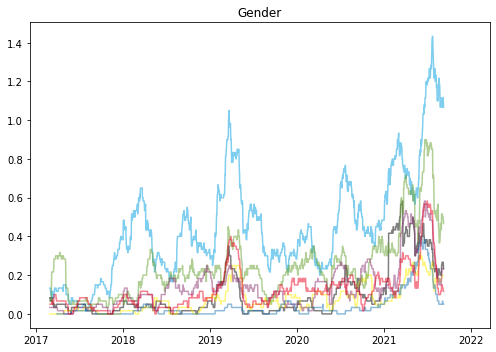

In [4]:

fig, ax = plt.subplots(figsize=(7,5))
from adjustText import adjust_text


offsets = [-0.2,.2]
ls = ["-","--"]

topic = {"name":"Gender"}

cutoff = datetime.datetime(2017,1,1,tzinfo=pytz.UTC)

ticks = []
texts = []
for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    counts = counts.rolling(60).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    texts.append(counts[-1])
    
#adjust_text(texts,only_move={"points":"y","texts":"xy"})
    
ax.set_title(topic["name"])
#ax.set_xticks([])
ax.set_xlim(xmax=ax.get_xlim()[1]*1.00015)

    
    #break
    
fig.tight_layout()

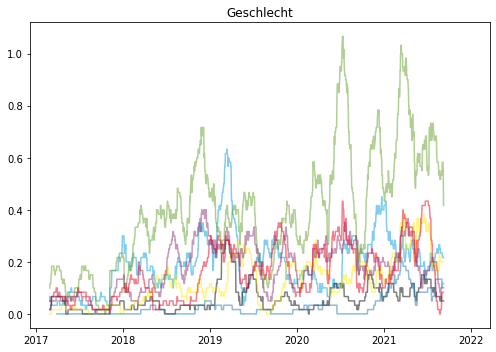

In [5]:
import datetime, pytz
fig, ax = plt.subplots(figsize=(7,5))
from adjustText import adjust_text


offsets = [-0.2,.2]
ls = ["-","--"]

topic = {"name":"Geschlecht"}

cutoff = datetime.datetime(2017,1,1,tzinfo=pytz.UTC)

ticks = []
texts = []
for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    counts = counts.rolling(60).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    texts.append(counts[-1])
    
#adjust_text(texts,only_move={"points":"y","texts":"xy"})
    
ax.set_title(topic["name"])
#ax.set_xticks([])
ax.set_xlim(xmax=ax.get_xlim()[1]*1.00015)

    
    #break
    
fig.tight_layout()

In [6]:
import numpy as np
alt_texts = np.array([])
for t in texts:
    if alt_texts.shape[0]>0:
        while min(abs(t-alt_texts))<0.05:
            min_el = np.argmin(abs(t-alt_texts))
            if t-alt_texts[min_el] < 0:
                t-=0.01
                alt_texts[min_el]+=0.01
            else:
                t+=0.01
                alt_texts[min_el]-=0.01
    alt_texts = np.append(alt_texts,t) 
    

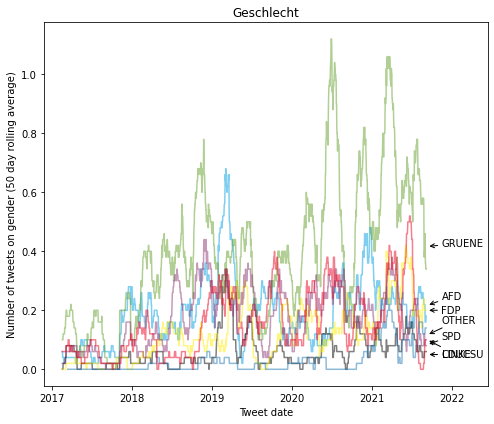

In [7]:
fig, ax = plt.subplots(figsize=(7,6))


for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    counts = group.groupby(group.index.date)[topic["name"]].sum()
    counts = counts.rolling(50).mean()
    ax.plot(counts, color=cdict[party.lower()],alpha=0.5)
    x = counts.index[-1]+datetime.timedelta(days=5)
    ax.annotate(
        party,(x,texts[i]),(x+datetime.timedelta(days=65),alt_texts[i]),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
    )
    
ax.set_title(topic["name"])
ax.set_xlim(xmax=counts.index[-1]+datetime.timedelta(days=280))

ax.set_xlabel('Tweet date')
ax.set_ylabel('Number of tweets on gender (50 day rolling average)')

fig.tight_layout()

/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


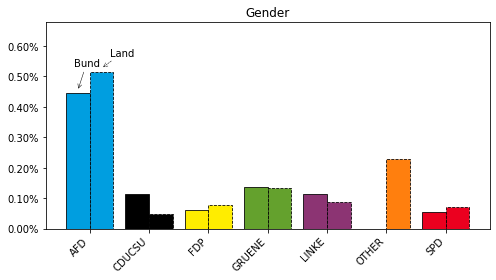

In [8]:
fig, ax = plt.subplots(figsize=(7,4))

offsets = [-0.2,.2]
ls = ["-","--"]

topic = {"name":"Gender"}

ticks = []
for i, (party, group) in enumerate(df[df.index>cutoff].groupby('party')):
    for k, bl in enumerate(["Bund","Land"]):
        pgroup = group[group["parltype"]==bl]
        ax.bar(
            i+offsets[k], pgroup[topic['name']].sum()/pgroup.shape[0], 
            color=cdict[party.lower()], width=0.4, linestyle=ls[k], lw=0.8,ec="black"
        )
        if i==0:
            ax.annotate(
                bl, (i+offsets[k],pgroup[topic['name']].sum()/pgroup.shape[0]*1.02),
                (i+0.25+offsets[k]*1.5,pgroup[topic['name']].sum()/pgroup.shape[0]*(1.2+-0.1*k)),
                arrowprops=dict(arrowstyle="->", linestyle=ls[k], lw=0.5,
                                connectionstyle="arc3"),
                ha="center"

            )
    ticks.append(party)
    
ax.set_ylim(ymax = ax.get_ylim()[1]*1.25)
ax.set_title(topic["name"])
#ax.set_xticks([])
ax.set_xticks(range(len(ticks)))
ax.set_xticklabels(ticks, rotation=45,ha="right")
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    #break
    
fig.tight_layout()

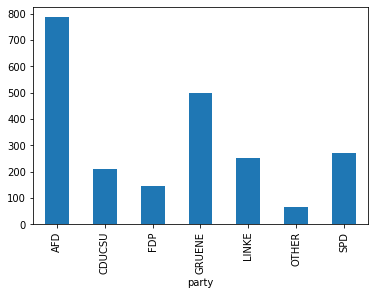

In [9]:
df[df['Gender']==1].groupby('party')['id'].count().plot.bar()

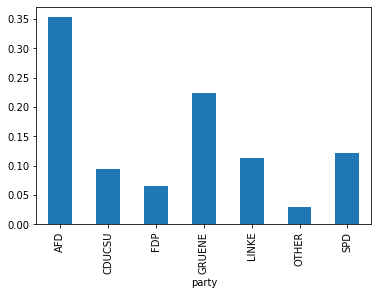

In [10]:
gprops = df[df['Gender']==1].groupby('party')['id'].count()/df['Gender'].sum()
gprops.plot.bar()

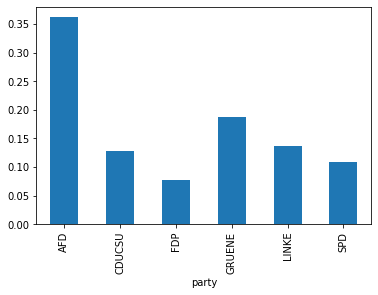

In [11]:
gprops = df[(df['region']=="Bund")].groupby('party')['Gender'].sum()/df[(df['region']=="Bund")]['Gender'].sum()
gprops.plot.bar()

In [12]:
authors = df.groupby('author_id')['Gender'].aggregate(["count","sum"]).reset_index()
authors['prop'] = authors['sum'] / authors['count']
authors = authors.sort_values('prop',ascending=False).reset_index(drop=True)

author_df = pd.read_csv('data/all_parliamentarians.csv').rename(columns={"id":"author_id"})
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Nachname"] + ", " + author_df.loc[noname,"Vorname"]
noname = pd.isna(author_df['Name, Vorname'])
author_df.loc[noname,"Name, Vorname"] = author_df.loc[noname,"Vorname Nachname"]
author_df['Name, Vorname'] = author_df['Name, Vorname'].str.strip()

authors = authors.merge(author_df)


for i, row in authors.head(8).iterrows():
    print("\n###########\n###########\n",row['Name, Vorname'],", ",row['party']," - ",row["region"])
    tweets = df[(df['author_id']==row['author_id']) & (df['Gender']==1)]
    for j, t in tweets.head().iterrows():
        print(t['text'])

authors


###########
###########
 Auricht, Jeannette ,  AfD  -  Berlin
Anne Will, Anne darf, Anne hat die Sendezeit. Und in dieser Zeit bringt die Moderatorin ihren Zuschauern jetzt das #Gendern bei.

Und dafür zahle ich den #Rundfunkbeitrag? Unfassbar!

https://t.co/D4YZMUpxvj
#Rundfunk #AnneWill #AfD https://t.co/Ankv9uPprM
Siehe da: Auch einige (wenige) Journalisten wundern sich über die Sprachvergewaltigung der #Gender-Sprache im öffentlich-rechtlichen Fernsehen: 
https://t.co/WtkBYc4yfe
#AnneWill #ARD #ZDF
#HarryPotter-Autorin #JKRowling spricht sich gegen Gendertheorie aus und der linke Shitstorm bricht über sie herein. Wie kann sie es nur wagen, Männern ihre Menstruation abzusprechen 🤦🏻‍♀️
https://t.co/4kuNeGzd5w
#AfD #Gender #Gendergaga https://t.co/RL6eEl2plQ

###########
###########
 Rose, Dr. Stephanie ,  Linke  -  Hamburg
Die Krise ist genau der richtige Zeitpunkt, um gender- und queerwissenschaftliche Strukturen in #Hamburg zu stärken und auszubauen. Die Genderwissenschaften müsse

,author_id,count,sum,prop,Nachname,Vorname,Fraktion,Twitter-Name,region,"Name, Vorname",Vorname Nachname,handle,party,parltype,person__in_parlperiod,lcasehandle
0,826402742893760512,32,3,0.093750,NaN,NaN,AFD,@JeanetteAuricht,Berlin,"Auricht, Jeannette",NaN,JeanetteAuricht,AfD,Land,NaN,jeanetteauricht
1,1250426686270660608,237,10,0.042194,Rose,Dr. Stephanie,DIE LINKE,@dielinke_rose,Hamburg,"Rose, Dr. Stephanie",NaN,dielinke_rose,Linke,Land,NaN,dielinke_rose
2,4121053541,321,12,0.037383,Jongen,Marc,NaN,NaN,Bund,"Jongen, Marc",NaN,Marc_Jongen,afd,Bund,[19],marc_jongen
3,4861233617,30,1,0.033333,NaN,NaN,CDU,@TobiasvdHeide,Schleswig-Holstein,Tobias von der Heide,Tobias von der Heide,TobiasvdHeide,CDUCSU,Land,NaN,tobiasvdheide
4,136561804,2083,61,0.029285,Dobusch,Gabi,SPD,@gdobusch,Hamburg,"Dobusch, Gabi",NaN,gdobusch,SPD,Land,NaN,gdobusch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,397443675,3178,0,0.000000,Abaci,Kazim,SPD,@KazimAbaci,Hamburg,"Abaci, Kazim",NaN,KazimAbaci,SPD,Land,NaN,kazimabaci
1254,398248240,2076,0,0.000000,von Brunn,Florian,SPD,@FlorianvonBrunn,Bayern,"von Brunn, Florian",NaN,FlorianvonBrunn,SPD,Land,NaN,florianvonbrunn
1255,399257453,731,0,0.000000,Kohler,Jochen,CSU,@KohlerJochen,Bayern,"Kohler, Jochen",NaN,KohlerJochen,CDUCSU,Land,NaN,kohlerjochen
1256,409203792,5859,0,0.000000,Schummer,Uwe,NaN,NaN,Bund,"Schummer, Uwe",NaN,UweSchummer,cducsu,Bund,"[17, 18, 19, 15, 16]",uweschummer


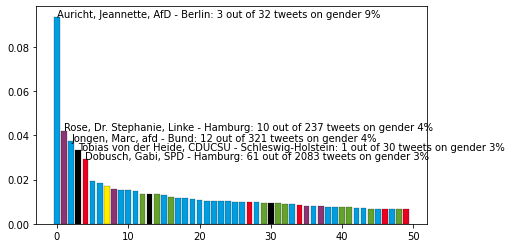

In [13]:
fig, ax = plt.subplots(figsize=(7,4))
sub_df = authors[authors['prop']>0].head(50)
colors = [cdict[x.lower()] for x in sub_df.party]
colors = [x if x is not None else "None" for x in colors]
bars = ax.bar(sub_df.index, sub_df.prop,color=colors,ec="black",lw=0.2)

texts = []

for i, row in sub_df.head(5).iterrows():
    t = f"{row['Name, Vorname']}, {row['party']} - {row['region']}: {row['sum']} out of {row['count']} tweets on gender {row['prop']:.0%}"
    texts.append(ax.text(i, row['prop'],t))
    
    


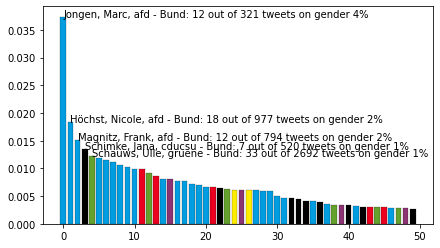

In [14]:
fig, ax = plt.subplots(figsize=(7,4))
sub_df = authors[(authors['prop']>0) & (authors['region']=="Bund")].reset_index().head(50)
colors = [cdict[x.lower()] for x in sub_df.party]
colors = [x if x is not None else "None" for x in colors]
bars = ax.bar(sub_df.index, sub_df.prop,color=colors,ec="black",lw=0.2)

texts = []

for i, row in sub_df.head(5).iterrows():
    t = f"{row['Name, Vorname']}, {row['party']} - {row['region']}: {row['sum']} out of {row['count']} tweets on gender {row['prop']:.0%}"
    texts.append(ax.text(i, row['prop'],t))
    
    


In [15]:
authors = authors.rename(columns={"count":"n_tweets","sum":"n_gender_tweets","prop":""})
authors.to_csv('data/politicians_gender.csv',index=False)

In [16]:
df[df['Gender']==1].reset_index()[["id","text","author_id","created_at"]].merge(authors).sort_values('author_id').to_csv('data/gender_tweets.csv',index=False)